# Netflix Duration Prediction - Supervised Regression Model

## Step 1: Problem Definition

**Business Problem:**
To build a machine learning model that predicts the duration of a movie on Netflix based on its metadata. This analysis can help in content scheduling, understanding temporal trends in movie durations, and optimizing user recommendations.

**Type of Problem:**
This is a **Supervised Regression** problem because we are predicting a continuous numerical value (`duration` in minutes) based on labeled input data.

**Input Features:** 
- `type`, `release_year`, `rating`, `country`, `listed_in`, etc.

**Target Variable:**
- `duration` (converted to numeric minutes).

## Step 2: Data Loading & Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('csv_files/netflix_titles.csv')

# Display basic info
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [2]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [3]:
# Summary Statistics
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [4]:
# Drop non-informative columns
df.drop(['show_id', 'description'], axis=1, inplace=True)
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy


## Pre-EDA Data Preparation
Before performing Exploratory Data Analysis (EDA), we need to create the target variable and filter the data as per the problem requirements.

- Filter for `Movie` type only.
- Convert `duration` string (e.g., "90 min") to numeric minutes.

In [5]:
# Filter for 'Movie' only
df = df[df['type'] == 'Movie'].copy()

# Convert duration to numeric minutes
# Removing ' min' and converting to float
df['duration_minutes'] = df['duration'].str.replace(' min', '').astype(float)

# Drop original duration and type column (since all are movies now)
df.drop(['duration', 'type'], axis=1, inplace=True)

# Check the new dataframe
print("New Shape:", df.shape)
df.head()

New Shape: (4265, 9)


,title,director,cast,country,date_added,release_year,rating,listed_in,duration_minutes
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,"Children & Family Movies, Comedies",90.0
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,Stand-Up Comedy,94.0
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,Comedies,99.0
6,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,"International Movies, Sci-Fi & Fantasy, Thrillers",110.0
7,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,Stand-Up Comedy,60.0


## Step 3: Exploratory Data Analysis (EDA)

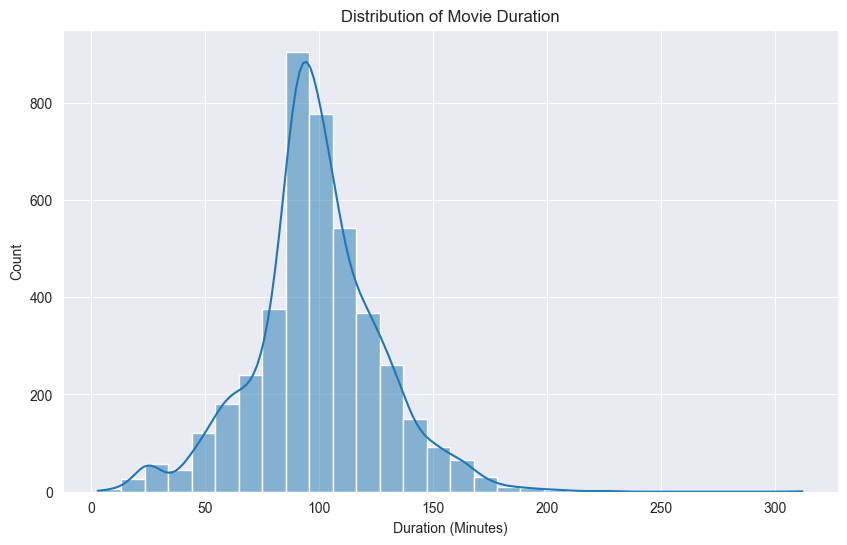

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.show()

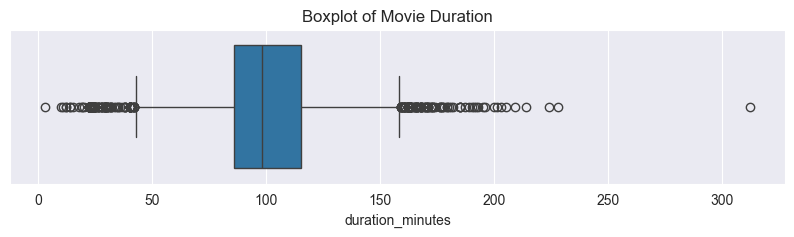

In [7]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['duration_minutes'])
plt.title('Boxplot of Movie Duration')
plt.show()

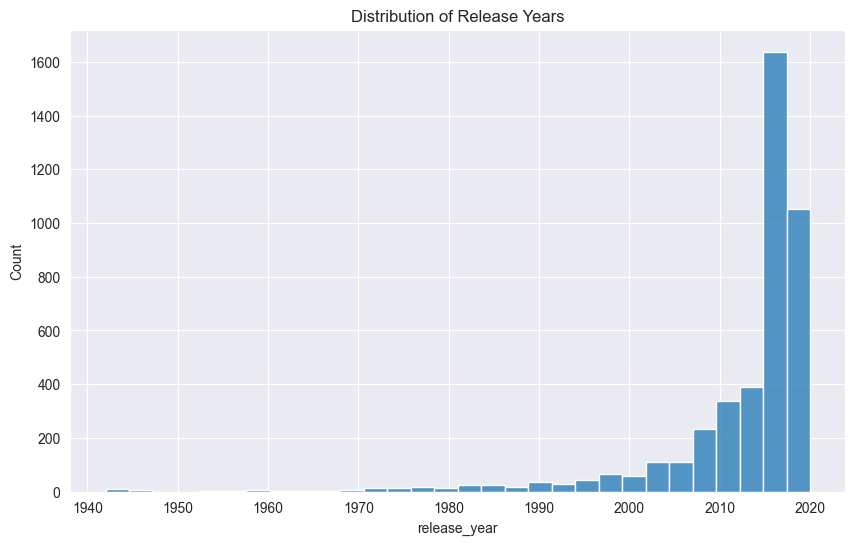

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title('Distribution of Release Years')
plt.show()

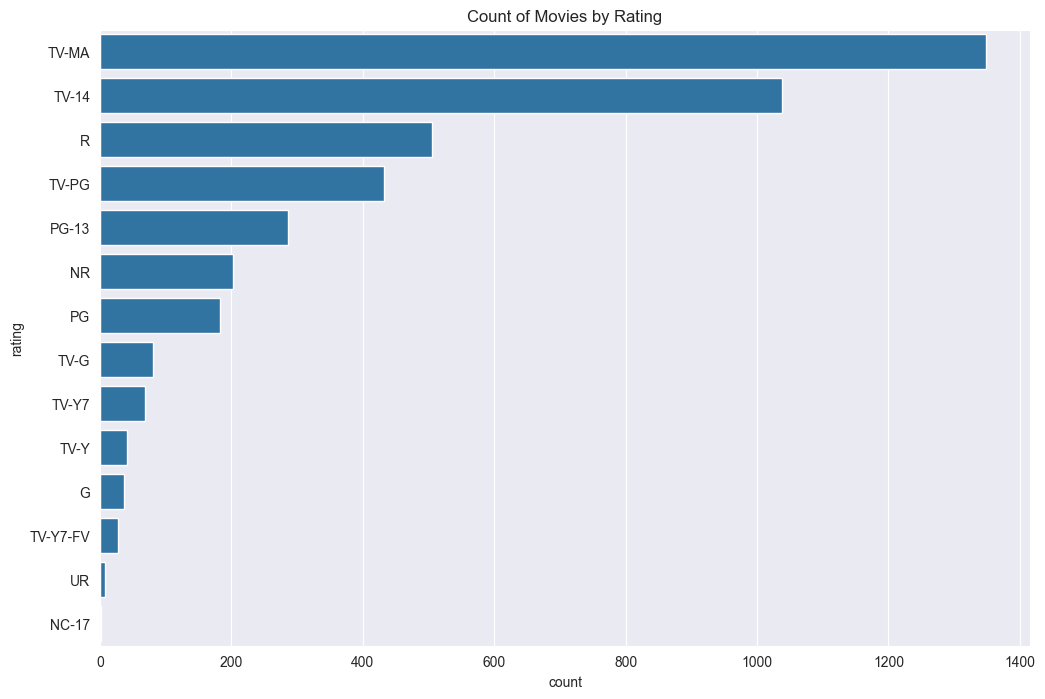

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title('Count of Movies by Rating')
plt.show()

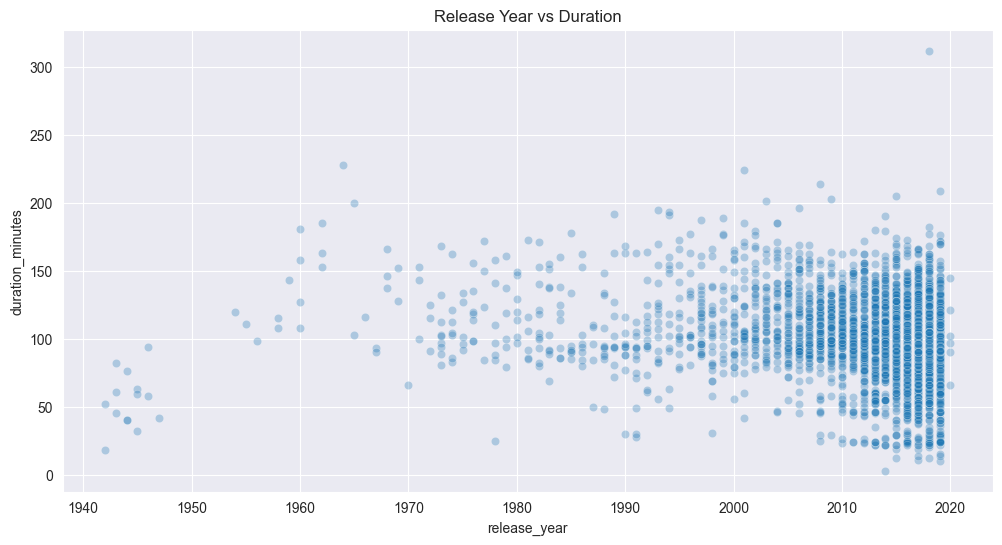

In [10]:
# Bivariate Analysis

# Release Year vs Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='duration_minutes', data=df, alpha=0.3)
plt.title('Release Year vs Duration')
plt.show()

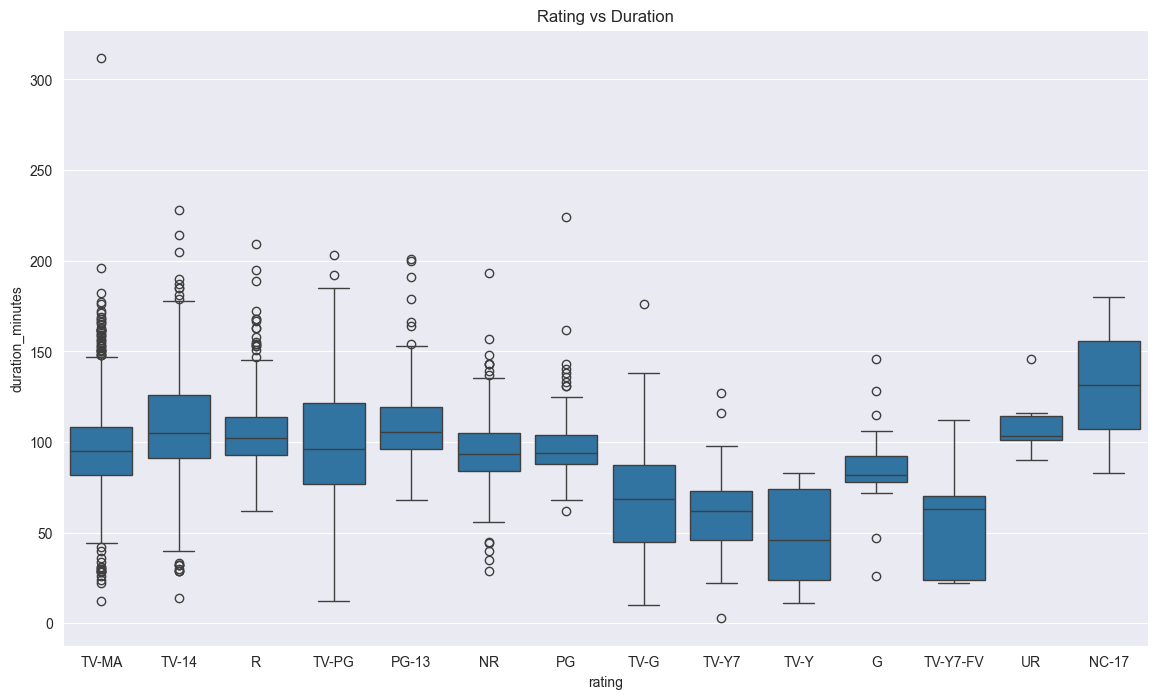

In [11]:
# Rating vs Duration
plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='duration_minutes', data=df, order=df['rating'].value_counts().index)
plt.title('Rating vs Duration')
plt.show()

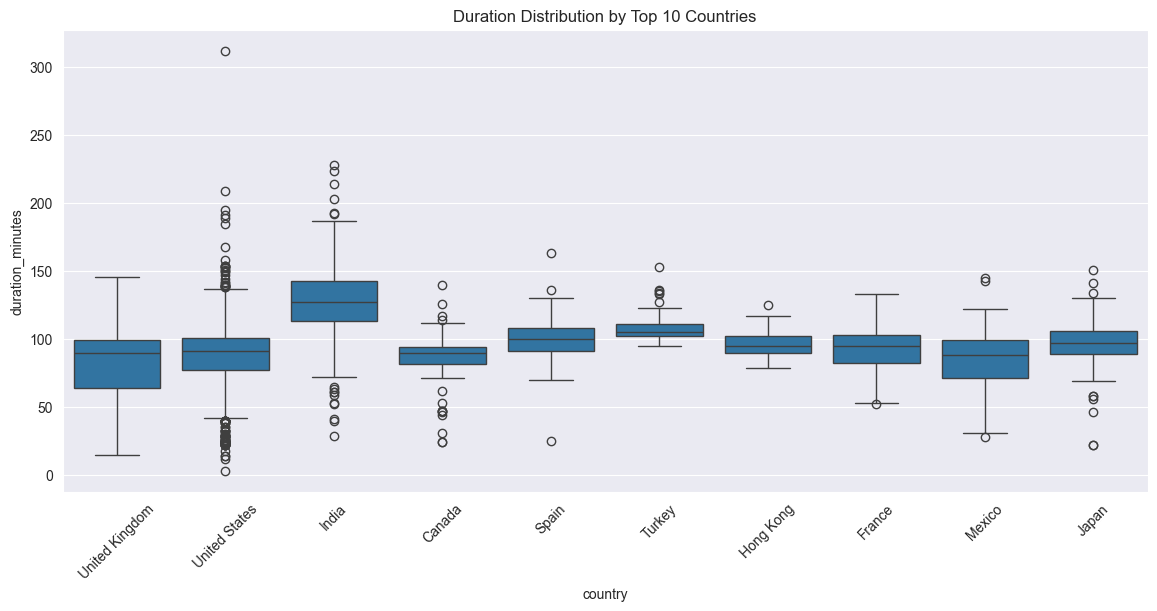

In [12]:
# Top 10 Countries vs Duration
top_countries = df['country'].value_counts().head(10).index

plt.figure(figsize=(14, 6))
sns.boxplot(x='country', y='duration_minutes', data=df[df['country'].isin(top_countries)])
plt.title('Duration Distribution by Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

## Step 4: Data Cleaning
- Handle missing values
- Remove duplicates
- Convert data types

In [13]:
# Check missing values
print(df.isnull().sum())

title                 0
director            128
cast                360
country             195
date_added            1
release_year          0
rating                8
listed_in             0
duration_minutes      0
dtype: int64


In [14]:
# Dropping rows where 'rating' is missing (small number usually)
df.dropna(subset=['rating'], inplace=True)

# Dropping rows where 'duration_minutes' might be null (though we likely handled it)
df.dropna(subset=['duration_minutes'], inplace=True)

# Filling missing values for high-cardinality categorical columns with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
listed_in           0
duration_minutes    0
dtype: int64


In [15]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Shape after deduping:", df.shape)

Shape after deduping: (4256, 9)


In [16]:
# Convert date_added to datetime
# Errors='coerce' will turn unparseable dates to NaT
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year/month if needed or drop rows with no date
df.dropna(subset=['date_added'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 0 to 5580
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             4256 non-null   object        
 1   director          4256 non-null   object        
 2   cast              4256 non-null   object        
 3   country           4256 non-null   object        
 4   date_added        4256 non-null   datetime64[ns]
 5   release_year      4256 non-null   int64         
 6   rating            4256 non-null   object        
 7   listed_in         4256 non-null   object        
 8   duration_minutes  4256 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 332.5+ KB


## Step 5: Data Preprocessing
We need to prepare the data for the model. 
- Simplify 'country': Keep top 10, label others as 'Other'.
- Simplify 'listed_in' (Genre): Determine primary genre.
- One-Hot Encode Categorical variables: `rating`, `primary_genre`, `country_grouped`.
- Feature Scaling.

In [17]:
# 1. Simplify 'country'
top_10_countries = df['country'].value_counts().head(10).index.tolist()
df['country_grouped'] = df['country'].apply(lambda x: x if x in top_10_countries else 'Other')

# 2. Simplify 'listed_in' to Primary Genre
# Taking the first term before comma
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

# Keep only relevant columns for modeling
modeling_df = df[['release_year', 'rating', 'country_grouped', 'primary_genre', 'duration_minutes']].copy()

# 3. One-Hot Encoding
modeling_df = pd.get_dummies(modeling_df, columns=['rating', 'country_grouped', 'primary_genre'], drop_first=True)

print("Shape after Encoding:", modeling_df.shape)
modeling_df.head()

Shape after Encoding: (4256, 42)


,release_year,duration_minutes,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,...,primary_genre_Horror Movies,primary_genre_Independent Movies,primary_genre_International Movies,primary_genre_Movies,primary_genre_Music & Musicals,primary_genre_Romantic Movies,primary_genre_Sci-Fi & Fantasy,primary_genre_Sports Movies,primary_genre_Stand-Up Comedy,primary_genre_Thrillers
0,2019,90.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2016,94.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,2017,99.0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2014,110.0,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,2017,60.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [18]:
# Features and Target
X = modeling_df.drop('duration_minutes', axis=1)
y = modeling_df['duration_minutes']

# 4. Feature Scaling (for release_year mainly)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Often good to scale 'release_year' as it is continuous
X['release_year'] = scaler.fit_transform(X[['release_year']])

X.head()

,release_year,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,...,primary_genre_Horror Movies,primary_genre_Independent Movies,primary_genre_International Movies,primary_genre_Movies,primary_genre_Music & Musicals,primary_genre_Romantic Movies,primary_genre_Sci-Fi & Fantasy,primary_genre_Sports Movies,primary_genre_Stand-Up Comedy,primary_genre_Thrillers
0,0.682750,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0.374836,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0.477474,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,0.169560,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,0.477474,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


## Step 6: Train-Test Split
Split the data into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (3404, 41)
Testing Set Shape: (852, 41)


## Step 7 & 8: Model Selection and Training
We will start with a **Linear Regression** model as a baseline. It provides high interpretability.

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize Model
lr_model = LinearRegression()

# Train Model
lr_model.fit(X_train, y_train)

print("Model Training Completed.")
print("Intercept:", lr_model.intercept_)
# Checking a few coefficients
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False).head(10)

Model Training Completed.
Intercept: 92.47314795578723


,Coefficient
rating_NC-17,39.015830
country_grouped_India,33.079120
country_grouped_Turkey,16.443415
rating_PG-13,15.368198
rating_R,13.900125
rating_PG,12.180353
country_grouped_Spain,11.102601
country_grouped_Other,9.534708
rating_TV-14,8.077946
rating_TV-MA,7.098721


## Step 9: Model Evaluation
We evaluate the model using:
- R² Score: Explains variance.
- Mean Absolute Error (MAE): Average absolute error in minutes.
- Root Mean Squared Error (RMSE): Penalizes large errors.

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on Test Set
y_pred = lr_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 15.05 minutes
Root Mean Squared Error (RMSE): 20.24 minutes
R² Score: 0.4476


## Step 10: Model Visualization
Visualizing Actual vs Predicted values to understand model performance.

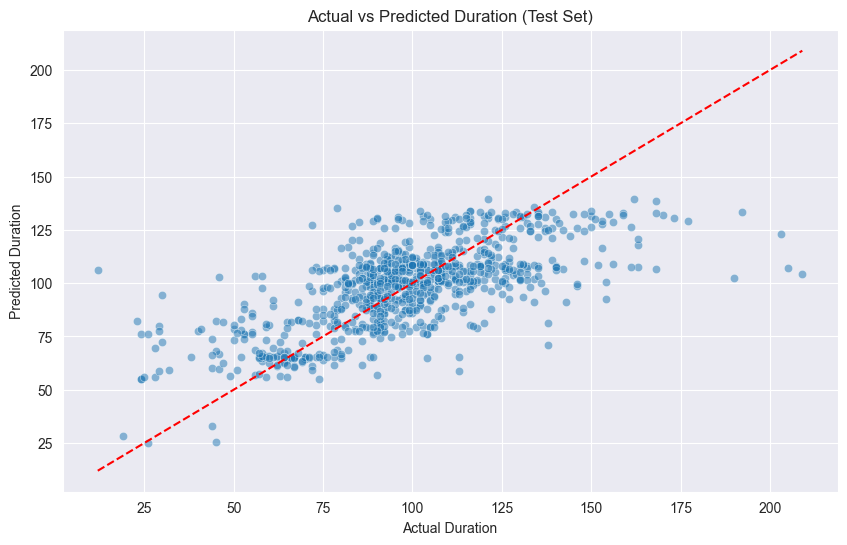

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration (Test Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Perfect prediction line
plt.show()

## Step 11: Prediction
Predicting duration for sample new movie inputs (taken from test set for format consistency).

In [23]:
# Example Predictions
sample_indices = y_test.sample(5).index
sample_preds = lr_model.predict(X_test.loc[sample_indices])
sample_actuals = y_test.loc[sample_indices].values

prediction_df = pd.DataFrame({'Actual': sample_actuals, 'Predicted': sample_preds})
prediction_df['Difference'] = prediction_df['Actual'] - prediction_df['Predicted']

print("Sample Predictions:")
print(prediction_df)

Sample Predictions:
   Actual   Predicted  Difference
0   107.0  106.197234    0.802766
1    80.0   65.039777   14.960223
2    84.0  101.359605  -17.359605
3   115.0  130.329368  -15.329368
4    90.0   81.537775    8.462225


## Step 12: Final Conclusion

- **EDA Insights:** Duration varies significantly by genre and country. Release year has a weak trend with duration.
- **Model Performance:** The Linear Regression model provides a baseline. 
    - The MAE indicates, on average, how many minutes our prediction is off.
    - Low R² would suggest that duration is hard to predict solely based on this metadata (Year, Rating, Country, Genre).
- **Future Work:**
    - Utilize the `description` column with NLP features.
    - Use more complex models like Random Forest or Gradient Boosting.
    - Include Cast/Director popularity scores.
